In [ ]:
###
# App Name:  Creating prediction models for typed projects in IFC, RVT formats (after conversion to JSON-CSV)
# App URI: https://opendatabim.io/
# Description: After converting IFC, RVT files into JSON-CSV formats, we can create prediction models.
# In this example, we accepted that all the project data that are saved in one CSV file we can equate 
# the price of the project. So having for example 50 typical projects with known price we can predict price 
# of 51 projects - 4_1house_R.csv: with new set of parameters by parametric data in CSV file.
# OpenDataBIM
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
###

In [108]:
# loading nessary libs
import pandas as pd
import glob, os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt 

In [109]:
# loading data files and union its to dataset
# os.chdir("/workdir") # specify here your data catalog
df = pd.DataFrame()
for file in glob.glob("*house*.csv"):
    print('Processing file:', file)
    # df = pd.concat([df, pd.read_csv(file)])
    df = df.append(pd.read_csv(file), ignore_index=True, verify_integrity=True)
    print('OK. Current df size:', len(df))
    print()
    

Processing file: 0_1house_R.csv
OK. Current df size: 269

Processing file: 10_1house_R.csv
OK. Current df size: 538

Processing file: 11_1house_R.csv
OK. Current df size: 807

Processing file: 12_1house_R.csv
OK. Current df size: 1076

Processing file: 13_1house_R.csv
OK. Current df size: 1345

Processing file: 14_1house_R.csv
OK. Current df size: 1614

Processing file: 15_1house_R.csv
OK. Current df size: 1883

Processing file: 16_1house_R.csv
OK. Current df size: 2152

Processing file: 17_1house_R.csv
OK. Current df size: 2421

Processing file: 18_1house_R.csv
OK. Current df size: 2690

Processing file: 19_1house_R.csv
OK. Current df size: 2959

Processing file: 1_1house_R.csv
OK. Current df size: 3228

Processing file: 20_1house_R.csv
OK. Current df size: 3497

Processing file: 21_1house_R.csv
OK. Current df size: 3766

Processing file: 22_1house_R.csv
OK. Current df size: 4035

Processing file: 23_1house_R.csv
OK. Current df size: 4304

Processing file: 24_1house_R.csv
OK. Current 

In [110]:
# take a look at the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   feature_1                   13719 non-null  int64  
 1   Category                    13719 non-null  int64  
 2   Family                      13719 non-null  int64  
 3   Type                        13719 non-null  int64  
 4   Length                      13719 non-null  float64
 5   Family and Type             13719 non-null  int64  
 6   Type Id                     13719 non-null  int64  
 7   Type Name                   13719 non-null  int64  
 8   Family Name                 13719 non-null  int64  
 9   Base Offset                 13719 non-null  float64
 10  Top Offset                  13719 non-null  float64
 11  Volume                      13719 non-null  int64  
 12  Structural Material         13719 non-null  float64
 13  Area                        137

In [111]:
# sample of dataset 
df.sample(6)

,feature_1,Category,Family,Type,Length,Family and Type,Type Id,Type Name,Family Name,Base Offset,...,Coarse Scale Fill Color,Height Offset From Level,Perimeter,Sill Height,Head Height,Wall Closure,Panel Width,Location Line,Number,price
11961,149,15,26,5,51708.255126,26,17,26,24,-731.147648,...,6.230297e+06,579.038153,65706.716383,865.472835,1888.849383,0.231891,1192.801907,1.742892,2.569462,174824.119557
11028,238,17,1,6,1652.027150,6,13,54,24,609.838820,...,1.385357e+07,1402.925104,80193.401618,623.609573,255.793952,1.325184,1120.134433,0.066059,3.229945,191853.246818
1586,86,17,43,10,5482.823587,26,5,6,12,417.652036,...,7.453849e+06,1927.879433,51289.142264,814.971168,1785.147485,3.928075,1167.997559,0.920997,2.146227,323447.967047
4556,124,16,29,5,38384.499556,45,5,26,17,3167.331491,...,6.365709e+06,123.432657,17351.227767,-378.632843,2924.835002,1.684620,1081.368093,0.730101,1.819569,354161.197718
884,79,2,5,6,12625.392720,6,15,6,3,1768.889937,...,4.022581e+06,776.070194,58477.766316,667.606803,379.724156,2.915907,1056.999081,1.764576,3.329595,345566.822437
11439,11,16,6,6,61702.323572,6,26,17,35,-923.319046,...,8.434875e+06,231.066083,13247.338069,-282.406227,134.069508,3.386809,821.214226,0.370473,3.486666,155766.403515


C:\Users\SSD_DK\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

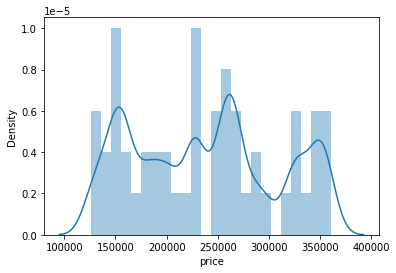

In [112]:
# take a look at the label distribution
sns.distplot(df.price)

In [114]:
# split dataset to features and label
y = df.price
df = df.drop(['price'], axis=1)
X = df
X.shape, y.shape

((13719, 39), (13719,))

In [115]:
# split features and label to train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.25)
X_train.shape, y_test.shape

((10289, 39), (3430,))

In [116]:
# Train GBM model 
import xgboost
model_xg = xgboost.XGBRegressor(n_estimators=5,
                                 max_features=7, 
                                 learning_rate=.1,
                                 random_state=42)
model_xg.fit(X_train, y_train)



[11:22:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_features=7, n_estimators=5, random_state=42)

Gradient tree boosting

Gradient boosting is typically used with decision trees (especially CART trees) of a fixed size as base learners. For this special case, Friedman proposes a modification to gradient boosting method which improves the quality of fit of each base learner.

Generic gradient boosting at the m-th step would fit a decision tree h m ( x ) {\displaystyle h_{m}(x)} {\displaystyle h_{m}(x)} to pseudo-residuals. Let J m {\displaystyle J_{m}} {\displaystyle J_{m}} be the number of its leaves. The tree partitions the input space into J m {\displaystyle J_{m}} {\displaystyle J_{m}} disjoint regions R 1 m , … , R J m m {\displaystyle R_{1m},\ldots ,R_{J_{m}m}} {\displaystyle R_{1m},\ldots ,R_{J_{m}m}} and predicts a constant value in each region. Using the indicator notation, the output of h m ( x ) {\displaystyle h_{m}(x)} {\displaystyle h_{m}(x)} for input x can be written as the sum:

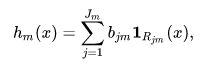

where b j m {\displaystyle b_{jm}} b_{jm} is the value predicted in the region R j m {\displaystyle R_{jm}} R_{jm}.[11]

Then the coefficients b j m {\displaystyle b_{jm}} b_{jm} are multiplied by some value γ m {\displaystyle \gamma _{m}} \gamma _{m}, chosen using line search so as to minimize the loss function, and the model is updated as follows:

   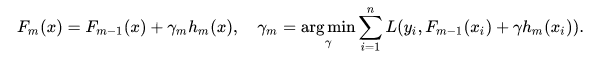

Friedman proposes to modify this algorithm so that it chooses a separate optimal value γ j m {\displaystyle \gamma _{jm}} {\displaystyle \gamma _{jm}} for each of the tree's regions, instead of a single γ m {\displaystyle \gamma _{m}} \gamma _{m} for the whole tree. He calls the modified algorithm "TreeBoost". The coefficients b j m {\displaystyle b_{jm}} b_{jm} from the tree-fitting procedure can be then simply discarded and the model update rule becomes:

 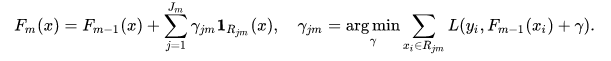

Source: wikipedia

MSE: 24715436896.99849


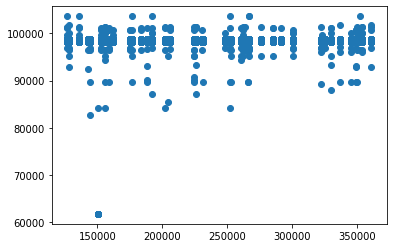

In [117]:
# use the model to predict label on validation data and compare result with ground true values.
# calculate MSE and build scatter of predict and ground true values
predict_xg = model_xg.predict(X_test)
print ('MSE:',mean_squared_error(y_test, predict_xg))
plt.scatter(y_test, predict_xg)

In [118]:
# Train linear model 
from sklearn.linear_model import ElasticNet
linear_model = ElasticNet(alpha = 9e-4, l1_ratio=0.4).fit(X_train, y_train)

Specification

The elastic net method overcomes the limitations of the LASSO (least absolute shrinkage and selection operator) method which uses a penalty function based on

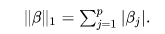

Use of this penalty function has several limitations.[1] For example, in the "large p, small n" case (high-dimensional data with few examples), the LASSO selects at most n variables before it saturates. Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others. To overcome these limitations, the elastic net adds a quadratic part to the penalty ( ‖ β ‖ 2 {\displaystyle \|\beta \|^{2}} \|\beta\|^2), which when used alone is ridge regression (known also as Tikhonov regularization). The estimates from the elastic net method are defined by

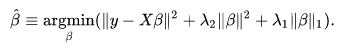

The quadratic penalty term makes the loss function strongly convex, and it therefore has a unique minimum. The elastic net method includes the LASSO and ridge regression: in other words, each of them is a special case where λ 1 = λ , λ 2 = 0 {\displaystyle \lambda _{1}=\lambda ,\lambda _{2}=0} \lambda_1 = \lambda, \lambda_2 = 0 or λ 1 = 0 , λ 2 = λ {\displaystyle \lambda _{1}=0,\lambda _{2}=\lambda } \lambda_1 = 0, \lambda_2 = \lambda. Meanwhile, the naive version of elastic net method finds an estimator in a two-stage procedure : first for each fixed λ 2 {\displaystyle \lambda _{2}} \lambda _{2} it finds the ridge regression coefficients, and then does a LASSO type shrinkage. This kind of estimation incurs a double amount of shrinkage, which leads to increased bias and poor predictions. To improve the prediction performance, the authors rescale the coefficients of the naive version of elastic net by multiplying the estimated coefficients by ( 1 + λ 2 ) {\displaystyle (1+\lambda _{2})} (1 + \lambda_2).

Source: wikipedia


MSE: 4941205944.483121


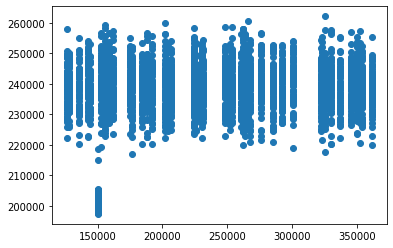

In [119]:
# use the model to predict label on validation data and compare result with ground true values.
# calculate MSE and build scatter of predict and ground true values
predict_linear = linear_model.predict(X_test)
print ('MSE:',mean_squared_error(y_test, predict_linear))
plt.scatter(y_test, predict_linear)

In [120]:
# Train Random Forest model 
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Algorithm

Preliminaries: decision tree learning

Main article: Decision tree learning


Decision trees are a popular method for various machine learning tasks. Tree learning "come[s] closest to meeting the requirements for serving as an off-the-shelf procedure for data mining", say Hastie et al., "because it is invariant under scaling and various other transformations of feature values, is robust to inclusion of irrelevant features, and produces inspectable models. However, they are seldom accurate".

In particular, trees that are grown very deep tend to learn highly irregular patterns: they overfit their training sets, i.e. have low bias, but very high variance. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

Forests are like the pulling together of decision tree algorithm efforts. Taking the teamwork of many trees thus improving the performance of a single random tree. Though not quite similar, forests give the effects of a K-fold cross validation.
Bagging
Main article: Bootstrap aggregating

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set X = x1, ..., xn with responses Y = y1, ..., yn, bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples:

    For b = 1, ..., B:

        Sample, with replacement, n training examples from X, Y; call these Xb, Yb.
        Train a classification or regression tree fb on Xb, Yb.

After training, predictions for unseen samples x' can be made by averaging the predictions from all the individual regression trees on x':

  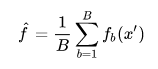
    
or by taking the majority vote in the case of classification trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

Additionally, an estimate of the uncertainty of the prediction can be made as the standard deviation of the predictions from all the individual regression trees on x':

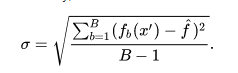

The number of samples/trees, B, is a free parameter. Typically, a few hundred to several thousand trees are used, depending on the size and nature of the training set. An optimal number of trees B can be found using cross-validation, or by observing the out-of-bag error: the mean prediction error on each training sample xi, using only the trees that did not have xi in their bootstrap sample. The training and test error tend to level off after some number of trees have been fit. 

Source: wikipedia

MSE: 4953584390.733292


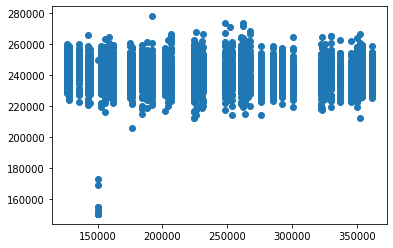

In [121]:
# use the model to predict label on validation data and compare result with ground true values.
# calculate MSE and build scatter of predict and ground true values
predict_rf = rf_model.predict(X_test)
print ('MSE:',mean_squared_error(y_test, predict_rf))
plt.scatter(y_test, predict_rf)

In [122]:
# select random data
new_project = pd.read_csv('4_1house_R.csv').sample(1)

In [123]:
# split data to features and label
new_project_gt = new_project['price']
new_project = new_project.drop(['price'], axis=1)

In [124]:
# predict result by models
new_project_predict_xg = model_xg.predict(new_project)
new_project_predict_l = linear_model.predict(new_project)
new_project_predict_rf = rf_model.predict(new_project)

In [125]:
# compare results with ground true value
print("Ground true value:", '% 6.2f' % np.mean(new_project_gt))
print("Predicted value (XG model):", '% 6.2f' %np.mean(new_project_predict_xg))
print("Predicted value (Linear model):", '% 6.2f' %np.mean(new_project_predict_l))
print("Predicted value (Random forest model):", '% 6.2f' %np.mean(new_project_predict_rf))

Ground true value:  174824.12
Predicted value (XG model):  98266.84
Predicted value (Linear model):  249061.55
Predicted value (Random forest model):  196694.09
